### Introduction
This notebook loads the parcel data for Washtenaw County and the census tract data for Michigan state with Pandas and GeoPandas.  The tract data includes GIS information on the boundaries of each census tract, and the parcel data includes the coordinates of the centroids of each parcel.  With help from the Shapely module, the census tract containing each parcel is found and its GEOID is added to the parcel data as the last column.  The latitude and longitude of each parcel are extracted from the original string format and added as two float valued columns to the parcel data.  The census tract shapefile is `cb_2017_26_tract_500k/cb_2017_26_tract_500k.shp`, the old parcel data is `Wash_nocoords.csv`, and the new parcel data is exported as a CSV file named `Wash_parcel_data_with_GEOID.csv`

In [ ]:
import numpy as np
import pandas
import shapely
import geopandas
import matplotlib.pyplot as plt
import re
import sys
from descartes.patch import PolygonPatch

### Load parcel data for Washtenaw County

In [2]:
Wash_parcel_data = pandas.read_csv("Wash_nocoords.csv")
print("Number of Parcels =", Wash_parcel_data.shape[0])
Wash_parcel_data.head()

Number of Parcels = 185975


C:\Users\pakij\AppData\Local\Continuum\Anaconda3\envs\gdaltest\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,28,29,41,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TAX_YEAR,TXPYRS_CARE_OF,TXPYRS_CITY,TXPYRS_COUNTRY,TXPYRS_NAME,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,2018.0,JILL KULASZEWSKI,WYANDOTTE,NaN,KULASZEWSKI & JERZEWSKI,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]"
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,2018.0,NaN,TIPTON,NaN,TAYLOR AVERY L,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]"
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,2018.0,NaN,WYANDOTTE,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]"
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,2018.0,WILLIAM SMITH,BRADENTON,NaN,VANBUREN PHILIP,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]"
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,2018.0,NaN,WYANDOTTE,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]"


### Load census tract data

In [3]:
tract_data = geopandas.read_file("cb_2017_26_tract_500k/cb_2017_26_tract_500k.shp")
print("Number of Tracts =", tract_data.shape[0])
tract_data.head()

Number of Tracts = 2772


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,26,001,970600,1400000US26001970600,26001970600,9706,CT,73252248,6711048,"POLYGON ((-83.42258199999999 44.590929, -83.40..."
1,26,015,010200,1400000US26015010200,26015010200,102,CT,183607986,2295050,"POLYGON ((-85.427487 42.740096, -85.4273709999..."
2,26,015,011300,1400000US26015011300,26015011300,113,CT,79063959,1281541,"POLYGON ((-85.30815899999999 42.610012, -85.29..."
3,26,017,280600,1400000US26017280600,26017280600,2806,CT,1165935,0,"POLYGON ((-83.88578099999999 43.589398, -83.88..."
4,26,017,285800,1400000US26017285800,26017285800,2858,CT,8318971,0,"POLYGON ((-83.932422 43.602248, -83.931901 43...."


### It's a tract!

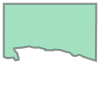

In [4]:
tract_data['geometry'][867]

### Extract the latitude and longitude of each parcel, convert from string to floats, and add back to table

In [5]:
num_parcels = Wash_parcel_data.shape[0]
lats = np.zeros(num_parcels)
lngs = np.zeros(num_parcels)
for i in range(0,num_parcels):
    LatLng = Wash_parcel_data["LatLngCentroid"].iloc[i]
    lat = re.search('(?<=\[\[)(.*)(?=,)',LatLng)
    lng = re.search('(?<=,)(.*)(?=\]\])',LatLng)
    lat = float(lat.group(0))
    lng = float(lng.group(0))
    lats[i] = lat
    lngs[i] = lng
    if(i%1000==0):
        percent = 100.*i/num_parcels
        sys.stdout.write("\r" + str('%.2f' % percent)+"%")
        sys.stdout.flush()

lat_min = lats.min()
lat_max = lats.max()
lng_min = lngs.min()
lng_max = lngs.max()
print("\nLat min/max = ",lat_min,lat_max)
print("Lng min/max = ",lng_min,lng_max)
Wash_parcel_data['LatCentroid']=lats
Wash_parcel_data['LngCentroid']=lngs
Wash_parcel_data.head()

99.48%
Lat min/max =  42.071727471 42.4344861679
Lng min/max =  -84.1324987052 -83.5399532304


,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TXPYRS_CITY,TXPYRS_COUNTRY,TXPYRS_NAME,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid,LatCentroid,LngCentroid
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,WYANDOTTE,NaN,KULASZEWSKI & JERZEWSKI,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]",42.071727,-84.127318
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,TIPTON,NaN,TAYLOR AVERY L,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]",42.071784,-84.126896
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,WYANDOTTE,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]",42.071839,-84.127327
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,BRADENTON,NaN,VANBUREN PHILIP,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]",42.072026,-84.109481
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,WYANDOTTE,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]",42.072120,-84.127177


### Convert to GeoDataFrame

In [16]:
geometry = [shapely.geometry.Point(xy) for xy in zip(Wash_parcel_data.LngCentroid, Wash_parcel_data.LatCentroid)]
crs = {'init': 'epsg:4269'}
Wash_parcel_gdf = geopandas.GeoDataFrame(Wash_parcel_data, crs=crs, geometry=geometry)
Wash_parcel_gdf.head()

,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TXPYRS_COUNTRY,TXPYRS_NAME,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid,LatCentroid,LngCentroid,geometry
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,KULASZEWSKI & JERZEWSKI,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]",42.071727,-84.127318,POINT (-84.1273178898 42.071727471)
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,NaN,TAYLOR AVERY L,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]",42.071784,-84.126896,POINT (-84.1268959529 42.0717837642)
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]",42.071839,-84.127327,POINT (-84.1273273462 42.0718389649)
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,NaN,VANBUREN PHILIP,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]",42.072026,-84.109481,POINT (-84.10948086010001 42.0720261674)
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]",42.072120,-84.127177,POINT (-84.12717736099999 42.072119565)


### Clip census tract data down to just Washtenaw County (judged by min/max lat/lng from parcel data)

In [17]:
#box_poly = shapely.geometry.Polygon(((-84.2, 42),(-83.5, 42),(-83.5, 42.5),(-84.2, 42.5)))
buffer = 0.001
box_poly = shapely.geometry.Polygon(((lng_min-buffer, lat_min-buffer),(lng_max+buffer, lat_min-buffer),
                                     (lng_max+buffer, lat_max+buffer),(lng_min-buffer, lat_max+buffer)))

#### Plot All the Tracts

<Figure size 864x864 with 0 Axes>

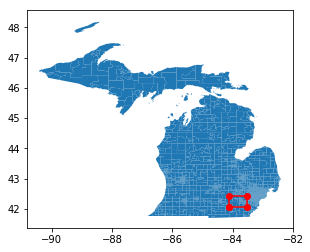

In [18]:
plt.figure(figsize=(12,12))
tract_data.plot()
x,y = box_poly.exterior.xy
plt.plot(x,y,'-o',color='red')
plt.show()

#### Washtenaw County Tracts

Number of clipped tracts =  131


<Figure size 864x864 with 0 Axes>

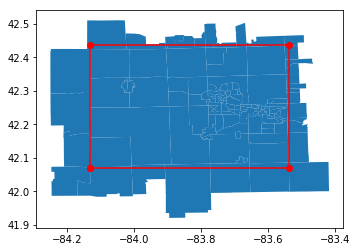

In [19]:
intersect = tract_data.intersects(box_poly)
clipped_tract_data = tract_data[intersect]
print("Number of clipped tracts = ", clipped_tract_data.shape[0])

plt.figure(figsize=(12,12))
clipped_tract_data.plot()
x,y = box_poly.exterior.xy
plt.plot(x,y,'-o',color='red')
plt.show()

### Figure out which tract each parcel is in, add its GEOID to the parcel data, and save as CSV file

In [33]:
Wash_parcel_with_GEOID = geopandas.sjoin(Wash_parcel_gdf, clipped_tract_data[['GEOID','geometry']], how="inner", op='intersects')
print("Done!")

Done!


In [62]:
Wash_parcel_with_GEOID.to_csv("Wash_parcel_data_with_GEOID.csv")
print("Done!")
Wash_parcel_with_GEOID.head()

Done!


,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid,LatCentroid,LngCentroid,geometry,index_right,GEOID
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]",42.071727,-84.127318,POINT (-84.1273178898 42.071727471),2737,26161431000
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]",42.071784,-84.126896,POINT (-84.1268959529 42.0717837642),2737,26161431000
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]",42.071839,-84.127327,POINT (-84.1273273462 42.0718389649),2737,26161431000
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]",42.072026,-84.109481,POINT (-84.10948086010001 42.0720261674),2737,26161431000
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]",42.072120,-84.127177,POINT (-84.12717736099999 42.072119565),2737,26161431000


### Check the results

POINT (-83.6382298839 42.1386384788)


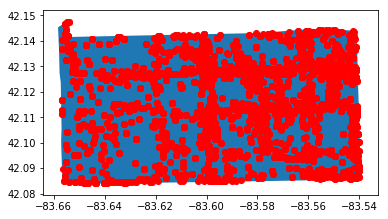

In [60]:
#Pick parcel 'i', and plot its census track along with all other parcels that have been assigned to the tract
#Are they all actually inside the tract?
i=30000

geoid = str(int(Wash_parcel_with_GEOID.iloc[i]["GEOID"]))
location = Wash_parcel_with_GEOID.iloc[i]['geometry']
tract_poly = clipped_tract_data[clipped_tract_data["GEOID"]==geoid].iloc[0]['geometry']

fig, ax = plt.subplots()
ax.set_aspect('equal')
clipped_tract_data[clipped_tract_data["GEOID"]==geoid].plot(ax=ax)
print(location)
Wash_parcel_with_GEOID[Wash_parcel_with_GEOID["GEOID"]==geoid].plot(ax=ax,color='red')
plt.show()


lng =  -83.6382298839 , lat =  42.1386384788
GEOID =  26161420200


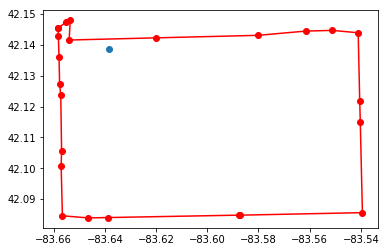

In [58]:
#Spot check the results - is parcel 'i' actually in the tract connected to GEOID?
i=30000

geoid = str(int(Wash_parcel_with_GEOID.iloc[i]["GEOID"]))
lat = Wash_parcel_with_GEOID.iloc[i]['LatCentroid']
lng = Wash_parcel_with_GEOID.iloc[i]['LngCentroid']
print('lng = ',lng,', lat = ',lat)
location = shapely.geometry.Point((lng,lat))
print('GEOID = ', geoid)
tract_poly = clipped_tract_data[clipped_tract_data["GEOID"]==geoid].iloc[0]['geometry']


plt.figure()
x,y = tract_poly.exterior.xy
plt.plot(x,y,'-o',color='red')
plt.scatter([lng],[lat])
plt.show()

### A MUCH slower way of doing the join
Don't do this!

In [ ]:
num_parcels = Wash_parcel_data.shape[0]
num_clipped_tracts = clipped_tract_data.shape[0]
print("Num parcels = ", num_parcels)
print("Num clipped tracts = ", num_clipped_tracts)

geoids = np.zeros(num_parcels)

for i in range(0, num_parcels):
    if(i%100==0):
        percent = 100.*i/num_parcels
        sys.stdout.write("\r" + str('%.2f' % percent)+"%")
        sys.stdout.flush()
        
    lat = Wash_parcel_data.iloc[i]['LatCentroid']
    lng = Wash_parcel_data.iloc[i]['LngCentroid']
    location = shapely.geometry.Point((lng, lat))
 
    j=0
    while(j<num_clipped_tracts and not location.within(clipped_tract_data.iloc[j]['geometry'])):      
        j+=1
        
    if(j == num_clipped_tracts):
        print(lng,lat)
        print("Tract not found for parcel ",i)
    else:
        geoids[i] = clipped_tract_data.iloc[j]['GEOID']

Wash_parcel_data['GEOID']=geoids
Wash_parcel_data.to_csv("Wash_parcel_data_w_geoid.csv")
print("\nDone!")

## Testing and Scratch Work

In [20]:
Wash_parcel_gdf.head()

,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TXPYRS_COUNTRY,TXPYRS_NAME,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid,LatCentroid,LngCentroid,geometry
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,KULASZEWSKI & JERZEWSKI,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]",42.071727,-84.127318,POINT (-84.1273178898 42.071727471)
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,NaN,TAYLOR AVERY L,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]",42.071784,-84.126896,POINT (-84.1268959529 42.0717837642)
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]",42.071839,-84.127327,POINT (-84.1273273462 42.0718389649)
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,NaN,VANBUREN PHILIP,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]",42.072026,-84.109481,POINT (-84.10948086010001 42.0720261674)
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,NaN,JEZAK DOROTHY TRUST,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]",42.072120,-84.127177,POINT (-84.12717736099999 42.072119565)


In [21]:
clipped_tract_data.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
53,26,091,062400,1400000US26091062400,26091062400,624,CT,55503947,202205,"POLYGON ((-84.008337 42.078005, -83.999528 42...."
55,26,093,744900,1400000US26093744900,26093744900,7449,CT,7162015,1129373,"POLYGON ((-83.76628099999999 42.429593, -83.75..."
121,26,161,400700,1400000US26161400700,26161400700,4007,CT,1048998,45327,"POLYGON ((-83.758928 42.28632899999999, -83.75..."
122,26,161,405600,1400000US26161405600,26161405600,4056,CT,2500844,0,"POLYGON ((-83.739136 42.236368, -83.739138 42...."
123,26,161,410100,1400000US26161410100,26161410100,4101,CT,1033847,12763,"POLYGON ((-83.66124099999999 42.259388, -83.65..."


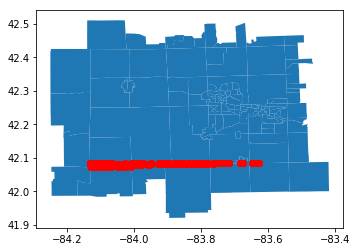

In [22]:
Wash_parcel_gdf_test = Wash_parcel_gdf.head(n=1000)

fig, ax = plt.subplots()
ax.set_aspect('equal')
clipped_tract_data.plot(ax=ax)
Wash_parcel_gdf_test.plot(ax=ax,color='red')
plt.show()


In [30]:
print(Wash_parcel_gdf_test.crs)
print(clipped_tract_data.crs)
Wash_parcel_with_GEOID = geopandas.sjoin(Wash_parcel_gdf_test, clipped_tract_data[['GEOID','geometry']], how="inner", op='intersects')
Wash_parcel_with_GEOID.head()

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


,ACREAGE_OF_PARENT,ASSESSED_VALUE,BUILDING_ASSESSMENT,CAPPED_VALUE,CVT_CODE,CVT_DESCRIPTION,HISTORICAL_DISTRICT,HOMESTEAD_TAXABLE,HOMESTEA_PCT,LASTUPDATE,...,TXPYRS_STATE,TXPYRS_STREET_ADDR,TXPYRS_ZIP_CODE,UNIT_APT_NUM,LatLngCentroid,LatCentroid,LngCentroid,geometry,index_right,GEOID
0,0.0,19350.0,0.0,16632.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,1449 SUPERIOR,48192,NaN,"[[42.071727471,-84.1273178898]]",42.071727,-84.127318,POINT (-84.1273178898 42.071727471),2737,26161431000
1,0.0,65650.0,0.0,55611.0,P,TOWNSHIP OF MANCHESTER,N,55611.0,100.0,1.436189e+12,...,MI,15000 AYRES HWY,49287,NaN,"[[42.0717837642,-84.1268959529]]",42.071784,-84.126896,POINT (-84.1268959529 42.0717837642),2737,26161431000
2,0.0,24750.0,0.0,17872.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,2006 DAVIS ST,48192,NaN,"[[42.0718389649,-84.1273273462]]",42.071839,-84.127327,POINT (-84.1273273462 42.0718389649),2737,26161431000
3,0.0,12350.0,0.0,11824.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.438698e+12,...,FL,1532 LEISURE DR,34207,NaN,"[[42.0720261674,-84.1094808601]]",42.072026,-84.109481,POINT (-84.10948086010001 42.0720261674),2737,26161431000
4,0.0,5150.0,0.0,3687.0,P,TOWNSHIP OF MANCHESTER,N,0.0,0.0,1.436189e+12,...,MI,2006 DAVIS ST,48192,NaN,"[[42.072119565,-84.127177361]]",42.072120,-84.127177,POINT (-84.12717736099999 42.072119565),2737,26161431000
